In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
data =pd.read_csv("/content/Class_heart_attack.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
X=data.drop('target',axis=1)
Y=data['target']

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y)

In [ ]:
xnewtrain,xvalid,ynewtrain,yvalid = train_test_split(xtrain,ytrain)

In [ ]:
model = Sequential()
model.add(Dense(13,activation='relu',input_dim=13))
model.add(Dense(20,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 13)                182       
                                                                 
 dense_13 (Dense)            (None, 20)                280       
                                                                 
 dense_14 (Dense)            (None, 50)                1050      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,563
Trainable params: 1,563
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002), 
              metrics=[tf.keras.metrics.binary_accuracy], 
              loss=tf.keras.losses.binary_crossentropy)

In [ ]:
hist=model.fit(xnewtrain,ynewtrain,batch_size=32,epochs=100,validation_data=(xvalid,yvalid))

Epoch 1/100
6/6 [==============================] - 1s 38ms/step - loss: 1.1563 - binary_accuracy: 0.4882 - val_loss: 1.1859 - val_binary_accuracy: 0.5439
Epoch 2/100
6/6 [==============================] - 0s 12ms/step - loss: 1.1660 - binary_accuracy: 0.6059 - val_loss: 0.7986 - val_binary_accuracy: 0.5614
Epoch 3/100
6/6 [==============================] - 0s 12ms/step - loss: 0.9184 - binary_accuracy: 0.4765 - val_loss: 0.6253 - val_binary_accuracy: 0.6667
Epoch 4/100
6/6 [==============================] - 0s 12ms/step - loss: 0.8897 - binary_accuracy: 0.6118 - val_loss: 0.6411 - val_binary_accuracy: 0.6667
Epoch 5/100
6/6 [==============================] - 0s 9ms/step - loss: 0.7232 - binary_accuracy: 0.5824 - val_loss: 0.7151 - val_binary_accuracy: 0.6491
Epoch 6/100
6/6 [==============================] - 0s 9ms/step - loss: 0.6228 - binary_accuracy: 0.6353 - val_loss: 0.6579 - val_binary_accuracy: 0.6667
Epoch 7/100
6/6 [==============================] - 0s 12ms/step - loss: 0.6306

In [ ]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

Text(0, 0.5, 'Loss')

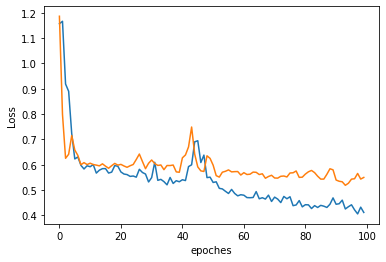

In [ ]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('epoches')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

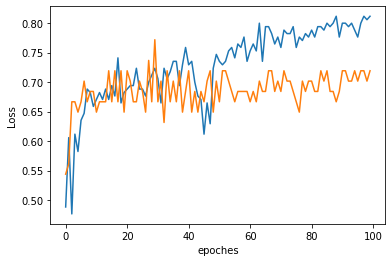

In [ ]:
plt.plot(hist.history['binary_accuracy'], label='Training Loss')
plt.plot(hist.history['val_binary_accuracy'], label='Validation Loss')
plt.xlabel('epoches')
plt.ylabel('Loss')

In [ ]:
ypred=model.predict(xtest)

3/3 [==============================] - 0s 3ms/step


In [ ]:
newypred=np.round(ypred)

In [ ]:
newypred

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(ytest,newypred)

array([[28, 13],
       [ 6, 29]])

In [ ]:
print(classification_report(ytest,newypred))

              precision    recall  f1-score   support

           0       0.82      0.68      0.75        41
           1       0.69      0.83      0.75        35

    accuracy                           0.75        76
   macro avg       0.76      0.76      0.75        76
weighted avg       0.76      0.75      0.75        76



In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Re_Car_Purchasing_Data.csv",encoding="ISO-8859-1")
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
X=data.drop(['Customer Name', 'Customer e-mail','Car Purchase Amount'],axis=1)
Y=data['Car Purchase Amount']

In [ ]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
X['Country'] = en.fit_transform(X['Country'])
X


,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,27,0,41.851720,62812.09301,11609.380910,238961.2505
1,17,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,1,43.152897,53798.55112,11160.355060,638467.1773
3,41,1,58.271369,79370.03798,14426.164850,548599.0524
4,26,1,57.313749,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...,...
495,128,0,41.462515,71942.40291,6995.902524,541670.1016
496,208,1,37.642000,56039.49793,12301.456790,360419.0988
497,144,1,53.943497,68888.77805,10611.606860,764531.3203
498,24,1,59.160509,49811.99062,14013.034510,337826.6382


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)
X

array([[-1.25451191, -1.01207287, -0.55074911,  0.05857619,  0.57427133,
        -1.11046945],
       [-1.42027285, -1.01207287, -0.67383422,  0.38657041, -0.0099515 ,
         0.57392937],
       [-1.68549034,  0.98807114, -0.38750768, -0.71236095,  0.4454518 ,
         1.19397625],
       ...,
       [ 0.68489103,  0.98807114,  0.96624515,  0.57832106,  0.28802326,
         1.92114437],
       [-1.30424019,  0.98807114,  1.62075409, -1.05333541,  1.26384749,
        -0.54019026],
       [ 1.76233711,  0.98807114,  0.06140832, -0.06470949, -0.06205457,
         0.18153098]])

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytst=train_test_split(X, Y, random_state=0)

In [ ]:
model = Sequential()
model.add(Dense(6,activation='relu',input_dim=6))
model.add(Dense(20,activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1,activation='linear'))
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
              metrics=[r2_score],
              loss='mean_squared_error', run_eagerly=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 20)                140       
                                                                 
 dense_14 (Dense)            (None, 50)                1050      
                                                                 
 dense_15 (Dense)            (None, 1)                 51        
                                                                 
Total params: 1,283
Trainable params: 1,283
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
hist=model.fit(xtrain,ytrain,epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
10/10 [==============================] - 1s 67ms/step - loss: 7284170.0000 - r2_score: 0.9298 - val_loss: 9856424.0000 - val_r2_score: 0.9187
Epoch 2/50
10/10 [==============================] - 1s 57ms/step - loss: 7181540.0000 - r2_score: 0.9313 - val_loss: 8793216.0000 - val_r2_score: 0.9250
Epoch 3/50
10/10 [==============================] - 1s 55ms/step - loss: 6833826.5000 - r2_score: 0.9356 - val_loss: 9201524.0000 - val_r2_score: 0.9231
Epoch 4/50
10/10 [==============================] - 1s 58ms/step - loss: 6679148.5000 - r2_score: 0.9366 - val_loss: 9009795.0000 - val_r2_score: 0.9253
Epoch 5/50
10/10 [==============================] - 1s 54ms/step - loss: 6457729.0000 - r2_score: 0.9395 - val_loss: 7950484.5000 - val_r2_score: 0.9318
Epoch 6/50
10/10 [==============================] - 1s 62ms/step - loss: 6284783.5000 - r2_score: 0.9398 - val_loss: 7920713.5000 - val_r2_score: 0.9324
Epoch 7/50
10/10 [==============================] - 1s 60ms/step - loss: 6101463.0

In [ ]:
hist.history.keys()

dict_keys(['loss', 'r2_score', 'val_loss', 'val_r2_score'])

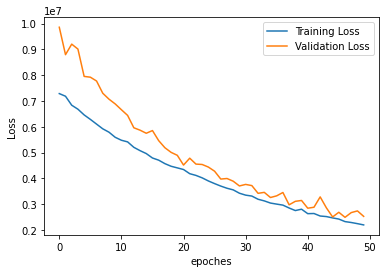

In [ ]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('epoches')
plt.ylabel('Loss')
plt.legend()

In [ ]:
ypred=model.predict(xtest)

4/4 [==============================] - 0s 4ms/step


In [ ]:
r2_score(ytst,ypred)

0.9748403179701655